In [1]:
import pandas as pd


In [2]:
column_names = [  "j0_x",  "j0_y", "j1_x", "j1_y" , "j2_x", "j2_y", "j3_x", "j3_y", "j4_x", "j4_y", "j5_x", "j5_y", "j6_x", "j6_y", "j7_x", "j7_y", "j8_x", "j8_y", "j9_x", "j9_y", "j10_x", "j10_y", "j11_x", "j11_y", "j12_x", "j12_y", "j13_x", "j13_y", 'j14_x', "j14_y", "j15_x", "j15_y", "j16_x", "j16_y", "j17_x", "j17_y" ]
data = pd.read_csv("poses_dataset/X_test.txt", sep=",", names=column_names, header=None)

In [3]:
data.shape

(184032, 36)

In [4]:
pose = data.head().iloc[0, :]
pose[0]

307.589

In [35]:
POSE_COCO_BODY_PARTS =  {
        0 : "Nose",
        1 : "Neck",
        2 : "RShoulder",
        3 : "RElbow",
        4 : "RWrist",
        5 : "LShoulder",
        6 : "LElbow",
        7 : "LWrist",
        8 : "RHip",
        9 : "RKnee",
        10 : "RAnkle",
        11 : "LHip",
        12 : "LKnee",
        13 : "LAnkle",
        14 : "REye",
        15 : "LEye",
        16 : "REar",
        17 : "LEar",
        18 : "Bkg",
    }
POSE_COCO_PAIRS = (1,2,   1,5,   2,3,   3,4,   5,6,   6,7,   1,8,   8,9,   9,10, 1,11,  11,12, 12,13,  1,0,   0,14, 14,16,  0,15, 15,17);
len(POSE_COCO_PAIRS)

34

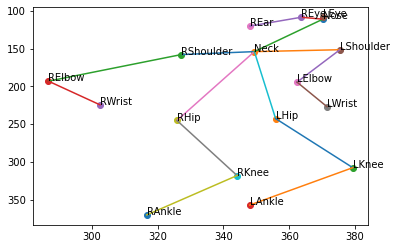

In [41]:
import matplotlib.pyplot as plt 
import numpy as np

pose = data.iloc[20000, :]
plt.gca().invert_yaxis()
for i in range(0, len(pose), 2):
    point = (pose[i], pose[i+1])
    if (point[0] == 0 and point[1] == 0):
        continue
    plt.scatter(point[0], point[1])
    plt.annotate(POSE_COCO_BODY_PARTS[i/2], (pose[i], pose[i+1]))



for i in range(0, len(POSE_COCO_PAIRS), 2):
    keypoint_1 = POSE_COCO_PAIRS[i]
    keypoint_2 = POSE_COCO_PAIRS[i+1]
    x = (pose[2*keypoint_1], pose[2*keypoint_2])
    y = (pose[2*keypoint_1+1], pose[2*keypoint_2+1])
    if ((x[0] == 0 and y[0] == 0) or (x[1] == 0 and y[1] == 0)):
        continue

    plt.plot(x, y)